In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
cd drive/My\ Drive/Insight_Project_2019/

/content/drive/My Drive/Insight_Project_2019


In [3]:
!pip install efficientnet #needed for train_effnet.py

  Created wheel for efficientnet: filename=efficientnet-0.0.4-cp36-none-any.whl size=14288 sha256=16d9dfb7d73d550132cabb4a4f44c8d21a90092fd69ee756ff70c2183692f180
  Stored in directory: /root/.cache/pip/wheels/5c/34/68/a611a699a28239e964ccf144c0e767cdb5439fee82ec5de6e0
Successfully built efficientnet


In [0]:
#!python train_resnet.py --help
#!python train_effnet.py --help

#!python train_effnet.py --test_size 256 --batch_size 1024 --loop 10 --max_patience 1
#!python train_resnet.py --test_size 256 --batch_size 1024 --loop 10 --max_patience 1

In [0]:
!mkdir images_aligned

In [5]:
!python align_images.py images_raw/ images_aligned/  #Cut all images in folder

Using TensorFlow backend.
64045056/64040097 [==============================] - 18s 0us/step
Aligning .DS_Store ...
Getting landmarks...
Exception in landmark detection!
Aligning 000003.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result images_aligned/000003_01.png
Aligning 000008.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result images_aligned/000008_01.png
Aligning 000001.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result images_aligned/000001_01.png
Aligning 000006.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result images_aligned/000006_01.png
Aligning 000004.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result images_aligned/000004_01.png
Aligning 000009.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result images_aligned/000009_01.png
Aligning 000002.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result images_aligned/000002_01.png
Aligning 000007.jpg ...
Getting l

In [6]:
!python encode_images.py --batch_size=1 --output_video=True --load_effnet=data/finetuned_effnet images_aligned/ images_generate/ images_latent/





Using TensorFlow backend.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

2019-10-03 03:46:54.508183: W tensorflow/compiler/jit/mark_for_compilation_pass.cc:1412] (One-time warning): Not using XLA:CPU for cluster because envvar TF_XLA_FLAGS=--tf_xla_cpu_global_jit was not set.  If you want XLA:CPU, either set that envvar, or use experimental_jit_scope to enable XLA:CPU.  To confirm that XLA is active, pass --vmodule=xla_compilation_cache=1 (as a proper command-line flag, not via TF_XLA_FLAGS) or set the envvar XLA_FLAGS=--xla_hlo_profile.


58892288/58889256 [==============================] - 5s 0us/step
  0% 0/9 [00:00<?, ?it/s]Loading ResNet Model:



  0% 0/100 [00:00<?, ?it/s]WARNING:tensorflow:From /content/drive/My Drive/Insight_Project_2019/encoder/perceptual_model.py:238: The name tf.train.AdamOptimizer is deprecated. Please use tf.compat.v1.train.AdamOptimizer instead.

Instructions for updating:
This op will be removed after

In [0]:
!python latent_feature_dataset.py

In [0]:
!python feature_axes.py

Using TensorFlow backend.





Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 16245 samples, validate on 4062 samples
Epoch 1/40
2019-10-02 23:25:12.526001: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:40] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
16245/16245 [==============================] - 4s 219us/step - loss: 0.2375 - val_loss: 0.2278
Epoch 2/40
16245/16245 [==============================] - 3s 158us/step - loss: 0.2218 - val_loss: 0.2256
Epoch 3/40
16245/16245 [==============================] - 3s 166us/step - loss: 0.2188 - val_loss: 0.2265
Epoch 4/40
16245/16245 [==============================] - 3s 160us/step - loss: 0.2185 - val_loss: 0.2298
Epoch 5/40
16245/16245 [==============================] - 2s 152us/step - loss: 0.2178 - val_loss: 0.2281
Epoch 6/40
16245/16245 [==============================] - 3s 155us/step - los

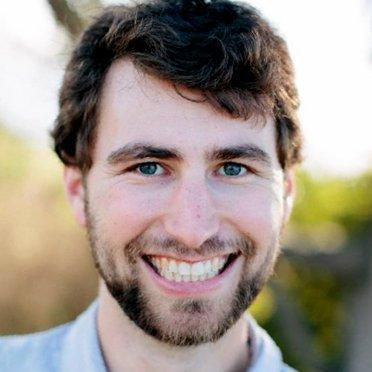

In [15]:
import PIL

display(PIL.Image.open('./images_raw/000001.jpg'))

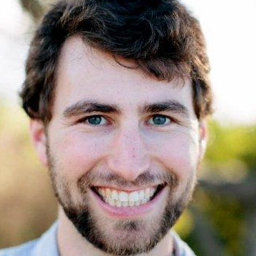

In [16]:
display(PIL.Image.open('./images_aligned/000001_01.png').resize((256,256)))

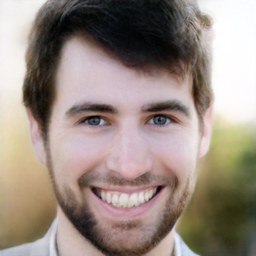

In [17]:
import numpy as np
from manipulate_latent import latent_to_image

image_latent = np.load('./images_latent/000001_01.npy')
latent_to_image(image_latent)

#import PIL
#from manipulate_latent import latent_to_imageRGB
#image_array = latent_to_imageRGB(image_latent)
#PIL.Image.fromarray(image_array, 'RGB').resize((256,256), PIL.Image.LANCZOS)


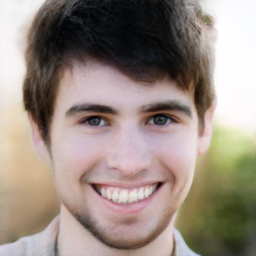

In [19]:
from manipulate_latent import tune_latent

feature_axis = np.load('./data/feature_axis.npy')
i = 1
direction = feature_axis[:,i].reshape((18, 512))
coeff = -10

image_latent_tuned = tune_latent(image_latent, direction, coeff, list(range(8)))
latent_to_image(image_latent_tuned)